In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

from osgeo import gdal, gdal_array
import rasterio

import matplotlib.pyplot as plt
plt.style.use('ggplot') 

import scipy.stats as stats

## Start workflow

In [24]:
img_list = pd.read_csv('../config/moths_datasets_0515.csv')
img_list

,WRS2,date,img_obs_fn,img_pred_fn,rmse_G,rmse_W
0,p012r031,2016-171,/projectnb/landsat/projects/Massachusetts/p012...,/projectnb/landsat/projects/Massachusetts/defo...,/projectnb/landsat/projects/Massachusetts/defo...,/projectnb/landsat/projects/Massachusetts/defo...
1,p012r031,2016-179,/projectnb/landsat/projects/Massachusetts/p012...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...
2,p012r031,2016-195,/projectnb/landsat/projects/Massachusetts/p012...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...
3,p012r031,2016-203,/projectnb/landsat/projects/Massachusetts/p012...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...
4,p012r031,2016-227,/projectnb/landsat/projects/Massachusetts/p012...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...
5,p012r031,2016-235,/projectnb/landsat/projects/Massachusetts/p012...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...
6,p012r031,2016-243,/projectnb/landsat/projects/Massachusetts/p012...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...
7,p013r031,2016-154,/projectnb/landsat/projects/Massachusetts/p013...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...
8,p013r031,2016-170,/projectnb/landsat/projects/Massachusetts/p013...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...
9,p013r031,2016-178,/projectnb/landsat/projects/Massachusetts/p013...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...,/projectnb/landsat/projects/Massachusetts/Moth...


In [17]:
img_id = 0

In [25]:
# Observed image
#img_obs_fn = '/projectnb/landsat/projects/Massachusetts/p012r031/images/LE70120312016171EDC01/LE70120312016171EDC01_all'
img_obs_fn = img_list['img_obs_fn'][img_id]
# Predicted image
#img_pred_fn = '/projectnb/landsat/projects/Massachusetts/Moths/paper_data/p012r031/moths_paper_3_prediction_2016-171_qa.tif'
img_pred_fn = img_list['img_pred_fn'][img_id]

#date = '2016-171'
date = img_list['date'][img_id]
#WRS2 = 'p012r031'
WRS2 = img_list['WRS2'][img_id]

rmse_G_fn = img_list['rmse_G'][img_id]
rmse_W_fn = img_list['rmse_W'][img_id]

## Read in observed image

In [26]:
with rasterio.open(img_obs_fn) as image:
    obs_ds = image.read()
    obs_G = obs_ds[8] # Greenness
    obs_W = obs_ds[9] # Wetness
    obs_mask = obs_ds[10] # Fmask result

In [27]:
# Print image dimensions
print(obs_G.shape)

# Visualize image data
#plt.imshow(obs_G)
#plt.colorbar()
#plt.show()

(7151, 7411)


## Read in predicted image

In [28]:
with rasterio.open(img_pred_fn) as image:
    pred_ds = image.read()
    pred_G = pred_ds[8] # Predicted Greenness
    pred_W = pred_ds[9] # Predicted Wetness

In [30]:
# Print image dimensions
print(pred_G.shape)

# Visualize image data
#plt.imshow(pred_G)
#plt.colorbar()
#plt.show()

(7151, 7411)


## Read in RMSE

In [31]:
with rasterio.open(rmse_G_fn) as image:
    rmse_G_ds = image.read()
    rmse_G = rmse_G_ds[4] # RMSE

In [32]:
with rasterio.open(rmse_W_fn) as image:
    rmse_W_ds = image.read()
    rmse_W = rmse_W_ds[4] # RMSE

## Difference observed and predicted

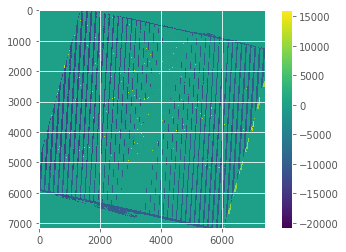

In [36]:
diff_G = (obs_G - pred_G) # subtract
diff_W = (obs_W - pred_W) # subtract

diff_G_stand = (obs_G - pred_G) / rmse_G # subtract
diff_W_stand = (obs_W - pred_W) / rmse_W # subtract

# Visualize difference images
plt.imshow(diff_G)
plt.colorbar()
plt.show()

#plt.imshow(diff_W)
#plt.colorbar()
#plt.show()

In [37]:
nodata = -9999

In [38]:
diff_G[obs_mask > 0] = nodata
diff_G[diff_G < -9999] = nodata

In [39]:
# Reshape image data for masking
diff_G_re = diff_G.reshape(diff_G.size)
diff_G_stand_re = diff_G_stand.reshape(diff_G_stand.size)
print(diff_G_re.shape)

diff_W_re = diff_W.reshape(diff_W.size)
diff_W_stand_re = diff_W_stand.reshape(diff_W_stand.size)
print(diff_W_re.shape)

mask_re = obs_mask.reshape(obs_mask.size)
print(mask_re.shape)
print(mask_re).max()

(52996061,)
(52996061,)
(52996061,)
255


In [40]:
diff_G_re[np.where(mask_re > 0)] = -9999
diff_G_re[np.where(diff_G_re < -9999)] = -9999

diff_G_stand_re[np.where(mask_re > 0)] = -9999
diff_G_stand_re[np.where(diff_G_re < -9999)] = -9999

diff_W_re[np.where(mask_re > 0)] = -9999
diff_W_re[np.where(diff_W_re < -9999)] = -9999

diff_W_stand_re[np.where(mask_re > 0)] = -9999
diff_W_stand_re[np.where(diff_G_re < -9999)] = -9999

In [41]:
diff_G_final = diff_G_re.reshape(diff_G.shape)
print(diff_G_final.min())
diff_G_stand_final = diff_G_stand_re.reshape(diff_G_stand.shape)

diff_W_final = diff_W_re.reshape(diff_W.shape)
print(diff_W_final.min())
diff_W_stand_final = diff_W_stand_re.reshape(diff_W_stand.shape)

-9999
-9999


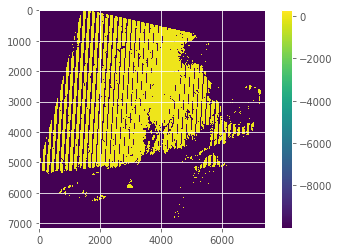

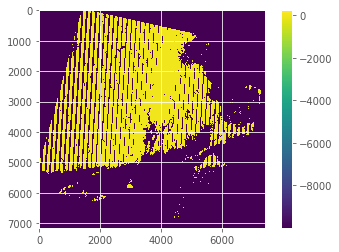

In [42]:
plt.imshow(diff_G_stand_final)
plt.colorbar()
plt.show()

plt.imshow(diff_W_stand_final)
plt.colorbar()
plt.show()

In [ ]:
in_ds = gdal.Open(img_obs_fn, gdal.GA_ReadOnly)
output_fn = 'TEST_{WRS2}_{date}_diff_G.tif'.format(date=date, WRS2=WRS2)

out_driver = gdal.GetDriverByName("GTiff")
out_ds = out_driver.Create(output_fn, 
                           diff_G.shape[1],  # x size
                           diff_G.shape[0],  # y size
                           1,  # number of bands
                           gdal.GDT_Int16)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_ds.GetRasterBand(1).WriteArray(diff_G)
out_ds.GetRasterBand(1).SetNoDataValue(-9999)
#out_ds.GetRasterBand(1).SetColorTable(ct)
out_ds.GetRasterBand(1).SetDescription('results')
out_ds = None

In [ ]:
in_ds = gdal.Open(img_obs_fn, gdal.GA_ReadOnly)
output_fn = '{WRS2}_{date}_diff_G_standardized.tif'.format(date=date, WRS2=WRS2)

out_driver = gdal.GetDriverByName("GTiff")
out_ds = out_driver.Create(output_fn, 
                           diff_G.shape[1],  # x size
                           diff_G.shape[0],  # y size
                           1,  # number of bands
                           gdal.GDT_Float32)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_ds.GetRasterBand(1).WriteArray(diff_G_stand_final)
out_ds.GetRasterBand(1).SetNoDataValue(-9999)
#out_ds.GetRasterBand(1).SetColorTable(ct)
out_ds.GetRasterBand(1).SetDescription('results')
out_ds = None

In [ ]:
in_ds = gdal.Open(img_obs_fn, gdal.GA_ReadOnly)
output_fn = '{WRS2}_{date}_diff_W.tif'.format(date=date, WRS2=WRS2)

out_driver = gdal.GetDriverByName("GTiff")
out_ds = out_driver.Create(output_fn, 
                           diff_W.shape[1],  # x size
                           diff_W.shape[0],  # y size
                           1,  # number of bands
                           gdal.GDT_Int16)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_ds.GetRasterBand(1).WriteArray(diff_W_final)
out_ds.GetRasterBand(1).SetNoDataValue(-9999)
#out_ds.GetRasterBand(1).SetColorTable(ct)
out_ds.GetRasterBand(1).SetDescription('results')
out_ds = None

In [ ]:
in_ds = gdal.Open(img_obs_fn, gdal.GA_ReadOnly)
output_fn = '{WRS2}_{date}_diff_W_standardized.tif'.format(date=date, WRS2=WRS2)

out_driver = gdal.GetDriverByName("GTiff")
out_ds = out_driver.Create(output_fn, 
                           diff_W.shape[1],  # x size
                           diff_W.shape[0],  # y size
                           1,  # number of bands
                           gdal.GDT_Float32)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())
out_ds.GetRasterBand(1).WriteArray(diff_W_stand_final)
out_ds.GetRasterBand(1).SetNoDataValue(-9999)
#out_ds.GetRasterBand(1).SetColorTable(ct)
out_ds.GetRasterBand(1).SetDescription('results')
out_ds = None